## Theorem3

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [69]:
c = 1.5
l = 0
a = 0.00001
theta = np.arcsin(np.sqrt(a))
m = math.floor(math.pi/(4*theta))
m

248

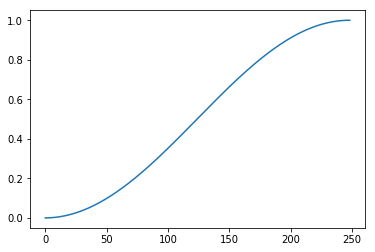

In [70]:
x = np.arange(m+1)
prob = np.array([(np.sin((2*j+1)*theta))**2 for j in x])
plt.plot(x,prob)

In [73]:
def one_step(M,a,theta):
    #3
    if np.random.rand()<a:
        return True,1
    #5
    j = np.random.randint(1,M+1) 
    
    #6,7
    prob = (np.sin((2*j+1)*theta))**2
    #print(prob)
    if np.random.rand()<prob:
        return True, 1+j
    
    return False,1+j

In [57]:
one_step(1,a,theta)

0.676


(False, 2)

In [131]:
def trail(a,theta):
    total_num = 0
    for i in range(1000):
        M = math.ceil(c**i)
        f,num = one_step(M,a,theta)
        total_num += num
        if f:
            return total_num,True
    return total_num,False

In [128]:
num_list= []
for i in range(1000):
    num,f = trail(a)
    num_list.append(num)
    if f is False:
        print('Fail')

In [94]:
num_list = np.array(num_list)

In [95]:
num_list.mean()

457.469

In [140]:
a_list = [0.1**(i+1) for i in range(10)]
a_list = np.array(a_list)
query_classic = 1/a_list
#plt.plot(np.log10(query_classic))

In [141]:
np.log10(query_classic)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [142]:
query_quantum = np.empty(0)
for a in a_list:
    sum_query = 0
    theta = np.arcsin(np.sqrt(a))
    for i in range(1000):
        num,f = trail(a,theta)
        sum_query += num
        if f is False:
            print('Fail')
    ave = sum_query/1000
    print(f'a:{a} query:{ave}')
    query_quantum = np.append(query_quantum,ave)

a:0.1 query:2.73
a:0.010000000000000002 query:11.967
a:0.0010000000000000002 query:48.725
a:0.00010000000000000002 query:141.206
a:1.0000000000000003e-05 query:448.518
a:1.0000000000000004e-06 query:1412.734
a:1.0000000000000004e-07 query:4338.878
a:1.0000000000000005e-08 query:13715.102
a:1.0000000000000005e-09 query:58014.016
a:1.0000000000000006e-10 query:139131.121


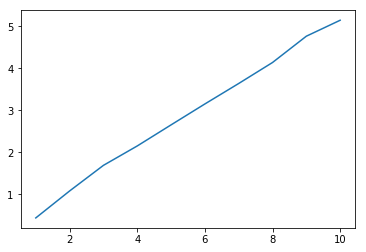

In [143]:
plt.plot(np.log10(query_classic),np.log10(query_quantum))

### The intuition behind the algorithm

In [108]:
list_y_2 = np.empty(0)

In [115]:
for i in range(10000):
    a = np.random.randint(1,10000)
    theta = np.random.rand()
    y = np.sin(a*theta)
    list_y_2 = np.append(list_y_2,y**2)

In [116]:
list_y_2.mean()

0.498687052168056

(array([4394., 1910., 1522., 1354., 1347., 1314., 1409., 1514., 1923.,
        4313.]),
 array([7.64406770e-09, 1.00000007e-01, 2.00000006e-01, 3.00000005e-01,
        4.00000004e-01, 5.00000003e-01, 6.00000002e-01, 7.00000001e-01,
        8.00000000e-01, 9.00000000e-01, 9.99999999e-01]),
 <a list of 10 Patch objects>)

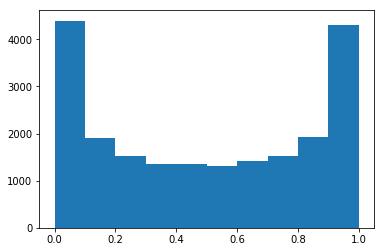

In [117]:
plt.hist(list_y_2)